In [1]:
#!/usr/bin/env python

# domain.ipynb

In [1]:
'''File name: domain.ipynb
    Author: Andreas Prein
    E-mail: prein@ucar.edu
    Date created: 31.05.2023
    Date last modified: 31.05.2023

    ############################################################## 
    Plots SAAG domain, subregions, and common analysis domain
    
    
'''

'File name: domain.ipynb\n    Author: Andreas Prein\n    E-mail: prein@ucar.edu\n    Date created: 31.05.2023\n    Date last modified: 31.05.2023\n\n    ############################################################## \n    Plots SAAG domain, subregions, and common analysis domain\n    \n    \n'

In [3]:
from dateutil import rrule
import datetime
import glob
from netCDF4 import Dataset
import sys, traceback
import dateutil.parser as dparser
import string
from pdb import set_trace as stop
import numpy as np
import numpy.ma as ma
import os
# from mpl_toolkits import basemap
# import ESMF
import pickle
import subprocess
import pandas as pd
from scipy import stats
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import pylab as plt
import random
import scipy.ndimage as ndimage
import scipy
import shapefile
import matplotlib.path as mplPath
from matplotlib.patches import Polygon as Polygon2
# Cluster specific modules
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.vq import kmeans2,vq, whiten
from scipy.ndimage import gaussian_filter
# import seaborn as sns
# import metpy.calc as mpcalc
import shapefile as shp
import sys 
import matplotlib.gridspec as gridspec
import seaborn
# from mpl_toolkits.basemap import Basemap, cm
import xarray as xr
import geopandas as gpd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial import ConvexHull
import cartopy.crs as ccrs




### User input

In [4]:
ncid=Dataset('/glade/campaign/mmm/c3we/prein/SouthAmerica/MCS-Tracking/GPM/2001/merg_2001123110_4km-pixel.nc', mode='r')
Lat=np.squeeze(ncid.variables['lat'][:])
Lon=np.squeeze(ncid.variables['lon'][:])
ncid.close()
Lon,Lat = np.meshgrid(Lon,Lat)

In [40]:
ncid=Dataset('/glade/campaign/univ/uiuc0017/chliu/WRF4KM_2000-2020/wrf2d_wrf3d/wrfconstants_SAAG_20yr.nc', mode='r')
lat_wrf=np.squeeze(ncid.variables['XLAT'][:])
lon_wrf=np.squeeze(ncid.variables['XLONG'][:])
hgt = np.squeeze(ncid.variables['HGT'][:])
ncid.close()

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

# Open the NetCDF file
ncfile = Dataset('/glade/campaign/univ/uiuc0017/chliu/WRF4KM_2000-2020/wrf2d_wrf3d/wrfconstants_SAAG_20yr.nc')
HGT = getvar(ncfile, "HGT")
LANDMASK = np.array(getvar(ncfile, "LANDMASK"))
cart_proj = get_cartopy(HGT)

In [84]:
import shapefile
sShapefiles='/glade/u/home/prein/papers/2020_SouthAmerica/Shapefiles/AR6/IPCC-AR6_SouthAmerica_fin.shp'
Regions = ['SCA','CAR','NWS','NSA','SAM','NES','SWS','SES','SSA','EPO','SPO','NAO','EAO','SAO']
SelRegions = ['NWS','NSA','NES','SAM','SES','NAO','EAO','SAO'] #,'SWS','SSA']
sRegNames=Regions

data = shapefile.Reader(sShapefiles, encoding="latin1")
Shapes = data# .to_crs(epsg=4326)

grShapeFiles={}
Coordinates = data.shapeRecords()
for sf in tqdm(range(len(Coordinates))):
    coord = np.array(Coordinates[sf].shape.points)
    x = coord[:,0]
    y = coord[:,1]
    TEST = np.array([x,y]).T
    if Regions[sf] in SelRegions:
        grShapeFiles[Regions[sf]]=TEST
rgsRegions = list(grShapeFiles.keys())

100%|██████████| 14/14 [00:00<00:00, 7500.35it/s]


### Plot map

In [71]:
from ExternalFunctions import gmtColormap
rgrColMap=gmtColormap(GMTPath='/glade/u/home/prein/MyPython_Programs/python/ColorMaps/', fileName='DEM_screen')
blue_red1 = LinearSegmentedColormap('BlueRed1', rgrColMap)
# cs = m.contourf(xi,yi,Height1[:],clevs,cmap=blue_red1)

mkdir: cannot create directory ‘’: No such file or directory


        Plot map to: Fig_01_domain.jpg


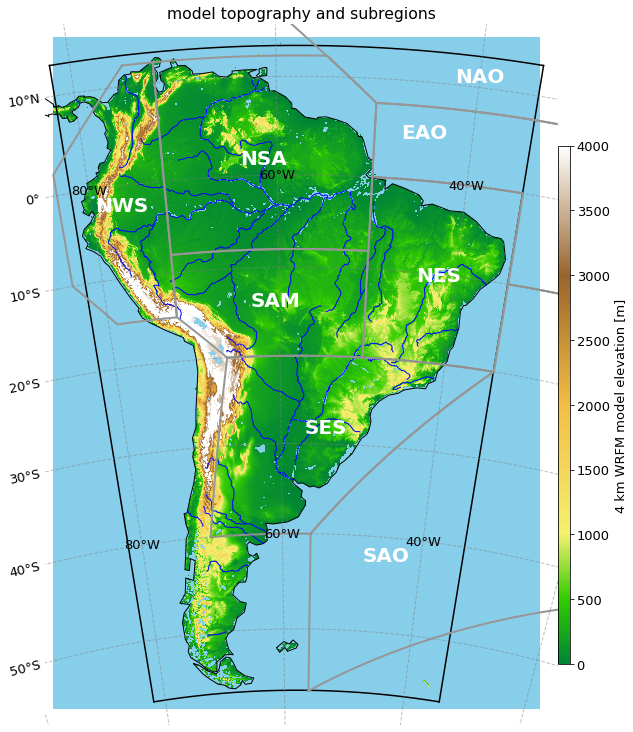

In [104]:
from scipy.ndimage import gaussian_filter
import matplotlib.gridspec as gridspec
# from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from pylab import *
import string
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapefile

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
from matplotlib.colors import LogNorm

import seaborn as sns
from scipy.stats import kde
import cartopy.feature as cfeature
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

fig = plt.figure(figsize=(8,12))
import seaborn as sns
plt.rcParams.update({'font.size': 13})

# Histogram plots
gs1 = gridspec.GridSpec(1,1) #rgiSize[2])
gs1.update(left=0.06, right=0.95,
           bottom=0.1, top=0.97,
           wspace=0.0, hspace=0.0)


# Plot the MCS Origin in Stage IV and CONUS404
proj = ccrs.PlateCarree() #ccrs.Robinson() 

ax = plt.subplot(gs1[0,0], projection=cart_proj)
plt.axis('off')
ax.set_extent((-82, -33, -58, 15), ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

im = plt.pcolormesh(lon_wrf,
                   lat_wrf,
                   hgt,
                   transform=ccrs.PlateCarree(),
                   cmap = blue_red1,
                   vmin=0,
                   vmax=4000)


# plot water blue
LANDMASK[LANDMASK > 0.5] = np.nan
plt.contourf(lon_wrf,
                   lat_wrf,
                   LANDMASK,
                   transform=ccrs.PlateCarree(),
                   colors = 'skyblue')

# plot outline of analysis domain
plt.plot(Lon[0,:], Lat[0,:],
         transform=ccrs.PlateCarree(),
        color='k')
plt.plot(Lon[-1,:], Lat[-1,:],
         transform=ccrs.PlateCarree(),
        color='k')
plt.plot(Lon[:,0], Lat[:,0],
         transform=ccrs.PlateCarree(),
        color='k')
plt.plot(Lon[:,-1], Lat[:,-1],
         transform=ccrs.PlateCarree(),
        color='k')


# Plot IPCC regions
for sr in range(len(SelRegions)): #range(rgiSize[2]):
    rgrShapeAct=np.array(grShapeFiles[rgsRegions[sr]])
    ax.plot(rgrShapeAct[:,0], rgrShapeAct[:,1],
            c='#969696', linewidth=2, transform=ccrs.PlateCarree())
    if SelRegions[sr] == 'EAO':
        lon_mean = -45
        lat_mean = 5
    elif SelRegions[sr] == 'NAO':
        lon_mean = -40
        lat_mean = 11
    elif SelRegions[sr] == 'SAO':
        lon_mean = -45
        lat_mean = -42
    else:
        lon_mean = np.mean(rgrShapeAct[:,0])
        lat_mean = np.mean(rgrShapeAct[:,1])
    
    plt.text(lon_mean,
            lat_mean,
            SelRegions[sr],
            ha='center', va='center',
            transform=ccrs.PlateCarree(), 
            weight='bold',
            fontsize=20,
            c='w')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# ocean110 = cfeature.NaturalEarthFeature('physical', 'ocean', \
#         scale='110m', edgecolor='none', facecolor=cfeature.COLORS['water'])
# ax.add_feature(ocean110)

ax.set_title('model topography and subregions')
# plt.contour(LonE,LatE,HGT, ccrs.PlateCarree(), levels=[500],linewidths=1, colors='k')

CbarAx = axes([0.95, 0.2, 0.02, 0.6])
cb = colorbar(im, cax = CbarAx, orientation='vertical')# , extend='max')#, ticks=np.linspace(0,0.0015,41))
# cb.ax.set_xticklabels(LEVS,rotation=90)
cb.set_label('4 km WRFM model elevation [m]') #, fontsize=12)

    
sPlotFile=''
sPlotName= 'Fig_01_domain.jpg'
if os.path.isdir(sPlotFile) != 1:
    subprocess.call(["mkdir","-p",sPlotFile])
fig.savefig(sPlotFile+sPlotName, bbox_inches='tight') #, dpi=700)
print( '        Plot map to: '+sPlotFile+sPlotName)
